# Customer Segmentation Project for an  eCommerce Company


In this project the customers of an English  eCommerce Company will be segmented based on recencey, frequency, and monetary (RFM) metrics. 
- Recency : How recently a customer has made a purchase
- Frequency : How often a customer makes a purchase
- Monetary : How much money a customer spends on purchases

The data belonging 2010 and 2011 will be retrieved from "https://archive.ics.uci.edu/ml/datasets/Online+Retail+II".

The variables of the data are below:

- InvoiceNo: Unique number for each transaction
- StockCode: unique number for each item
- Description: Product name
- Quantity: Number of items sold
- InvoiceDate: Date of Invoice
- UnitPrice: Price for each item
- CostomerID: Unique costomer ID
- Country: Country where costomers reside

After finding RFM metrics KMeans Machine Learning Method will be used to group the custemers in different clusters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)

# to display all columns and rows:
pd.set_option('display.max_columns', None); pd.set_option('display.max_rows', None);


pd.set_option('display.float_format', lambda x: '%.0f' % x)
import matplotlib.pyplot as plt

In [2]:
#The data downloaded from "https://archive.ics.uci.edu/ml/datasets/Online+Retail+II" in excel format and uploaded.

df_2010_2011 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2010-2011")

In [3]:
df = df_2010_2011.copy()

In [4]:
df.shape

(541910, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


In [7]:
#The numbers of unique items

df['Description'].nunique()

4223

In [8]:
#The numbers of items one by one

df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [9]:
#The most ordered product?

df.groupby("Description").agg({"Quantity":"sum"}).sort_values("Quantity", ascending = False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
JUMBO BAG RED RETROSPOT,47363
ASSORTED COLOUR BIRD ORNAMENT,36381
POPCORN HOLDER,36334
PACK OF 72 RETROSPOT CAKE CASES,36039


In [10]:
#Total invoices

df['Invoice'].nunique()

25900

In [11]:
#How much money has been earned in average per invoice?

df["TotalPrice"] = df["Quantity"]*df["Price"]

In [12]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [13]:
# Total amount per invoice

df.groupby("Invoice").agg({"TotalPrice":"sum"}).head()

,TotalPrice
Invoice,
536365,139
536366,22
536367,279
536368,70
536369,18


In [14]:
#The most expensive products

df.sort_values('Price', ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970,15098,United Kingdom,-38970
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836,nan,United Kingdom,-17836
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:55:00,16888,nan,United Kingdom,-16888
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2011-01-05 09:57:00,16454,nan,United Kingdom,-16454
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541,nan,United Kingdom,-13541


In [15]:
# Invoices including C (returns) and A (has problem) should be excluded

df_new = df[~(df['Invoice'].str.contains('C',na=False) | df['Invoice'].str.contains('A',na=False))]

In [16]:
df_new.sort_values("Price", ascending = False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541,nan,United Kingdom,13541
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8143,16029,United Kingdom,8143
297725,562955,DOT,DOTCOM POSTAGE,1,2011-08-11 10:14:00,4505,nan,United Kingdom,4505
268028,560373,M,Manual,1,2011-07-18 12:30:00,4288,nan,United Kingdom,4288
422377,573080,M,Manual,1,2011-10-27 14:20:00,4161,12536,France,4161


In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532619 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      532619 non-null  object        
 1   StockCode    532619 non-null  object        
 2   Description  531165 non-null  object        
 3   Quantity     532619 non-null  int64         
 4   InvoiceDate  532619 non-null  datetime64[ns]
 5   Price        532619 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      532619 non-null  object        
 8   TotalPrice   532619 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 40.6+ MB


In [18]:
# Number of orders by country

df_new["Country"].value_counts()

United Kingdom          487619
Germany                   9042
France                    8409
EIRE                      7894
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Unspecified                446
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon 

In [19]:
# The amount of income by country

df_new.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending = False).head()

,TotalPrice
Country,
United Kingdom,9014160
Netherlands,285446
EIRE,283454
Germany,228867
France,209733


In [20]:
# the most returned product (PAPER CRAFT , LITTLE BIRDIE)

df_return = df[df['Invoice'].str.contains('C',na=False)]
groupedC = df_return.groupby('Description',sort=False).agg({'Quantity':'sum','Price':'max','TotalPrice':'sum'})
groupedC.sort_values('Quantity',ascending=True).head()

,Quantity,Price,TotalPrice
Description,,,
"PAPER CRAFT , LITTLE BIRDIE",-80995,2,-168470
MEDIUM CERAMIC TOP STORAGE JAR,-74494,1,-77480
ROTATING SILVER ANGELS T-LIGHT HLDR,-9376,3,-322
Manual,-4066,38970,-146784
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150,2,-6591


## Data preparation

In [21]:
df_new.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    134694
Country             0
TotalPrice          0
dtype: int64

In [22]:
df_new.dropna(inplace = True)

<ipython-input-22-8435a3118ee6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.dropna(inplace = True)


In [23]:
df_new.shape

(397925, 9)

In [24]:
df_new.describe([0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Quantity,397925,13,180,1,1,1,1,2,6,12,24,36,120,80995
Price,397925,3,22,0,0,0,1,1,2,4,6,8,15,8143
Customer ID,397925,15294,1713,12346,12415,12627,12883,13969,15159,16795,17725,17912,18211,18287
TotalPrice,397925,22,309,0,1,1,2,5,12,20,35,68,202,168470


## Creating  RFM Metrics

In [25]:
df_new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397925 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397925 non-null  object        
 1   StockCode    397925 non-null  object        
 2   Description  397925 non-null  object        
 3   Quantity     397925 non-null  int64         
 4   InvoiceDate  397925 non-null  datetime64[ns]
 5   Price        397925 non-null  float64       
 6   Customer ID  397925 non-null  float64       
 7   Country      397925 non-null  object        
 8   TotalPrice   397925 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [27]:
df_new["InvoiceDate"].min()

Timestamp('2010-12-01 08:26:00')

In [28]:
df_new["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [29]:
#Since these are old data, the last date in data set will be used as today's date

import datetime as dt
today_date = dt.datetime(2011,12,9)

In [30]:
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [31]:
df_new.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:01:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [32]:
df_new["Customer ID"] = df_new["Customer ID"].astype(int)

<ipython-input-32-3450c9d28d7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Customer ID"] = df_new["Customer ID"].astype(int)


In [33]:
(today_date - df_new.groupby("Customer ID").agg({"InvoiceDate":"max"})).head()

,InvoiceDate
Customer ID,
12346,324 days 13:59:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [34]:
temp_df = (today_date - df_new.groupby("Customer ID").agg({"InvoiceDate":"max"}))

In [35]:
temp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)

In [36]:
temp_df.head()

,Recency
Customer ID,
12346,324 days 13:59:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [37]:
#Exculiding hours

recency_df = temp_df["Recency"].apply(lambda x: x.days)

In [38]:
recency_df.head()

Customer ID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64

### Frequency

In [39]:
temp_df = df_new.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})

In [40]:
temp_df.head()

Invoice
Customer ID Invoice         
12346       541431         1
12347       537626        31
            542237        29
            549222        24
            556201        18

In [41]:
temp_df.groupby("Customer ID").agg({"Invoice":"count"}).head()

,Invoice
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


In [42]:
freq_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,1
12347,7
12348,4
12349,1
12350,1


### Monetary

In [43]:
monetary_df = df_new.groupby("Customer ID").agg({"TotalPrice":"sum"})

In [44]:
monetary_df.head()

,TotalPrice
Customer ID,
12346,77184
12347,4310
12348,1797
12349,1758
12350,334


In [45]:
monetary_df.rename(columns={"TotalPrice": "Monetary"}, inplace = True)

In [46]:
print(recency_df.shape,freq_df.shape,monetary_df.shape)

(4339,) (4339, 1) (4339, 1)


In [47]:
rfm = pd.concat([recency_df, freq_df, monetary_df],  axis=1)

In [48]:
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,1,77184
12347,1,7,4310
12348,74,4,1797
12349,17,1,1758
12350,309,1,334


# KMeans Clustering

In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [50]:
# mms = MinMaxScaler 

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler((0,1))
cols = rfm.columns
index = rfm.index
scaled_rfm = mms.fit_transform(rfm)
scaled_rfm = pd.DataFrame(scaled_rfm, columns = cols, index = index)
scaled_rfm.head() 

,Recency,Frequency,Monetary
Customer ID,,,
12346,1,0,0
12347,0,0,0
12348,0,0,0
12349,0,0,0
12350,1,0,0


In [51]:
kmeans = KMeans(n_clusters = 4)
kmeans

KMeans(n_clusters=4)

In [52]:
k_fit = kmeans.fit(scaled_rfm)
k_fit

KMeans(n_clusters=4)

In [53]:
k_fit.cluster_centers_

array([[0.22314973, 0.00771622, 0.00360561],
       [0.51747559, 0.0041366 , 0.00257383],
       [0.05235601, 0.02581064, 0.01163221],
       [0.82704269, 0.00167512, 0.00202248]])

In [54]:
k_fit.labels_

array([3, 2, 0, ..., 2, 2, 2])

### Optimal number of clusters


In [55]:
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(scaled_rfm)
    ssd.append(kmeans.inertia_)

In [56]:
ssd

[322.2054834062645,
 74.1413483980076,
 40.85328753967003,
 27.195172218866226,
 20.580887111663042,
 16.093412043175043,
 12.745033249326495,
 10.878682455503366,
 9.561764094000326,
 8.256292021201206,
 7.036118606032846,
 6.099835972085846,
 5.283532505395917,
 4.621897260229332,
 4.165624781672106,
 3.79018989372308,
 3.5250649490045025,
 3.2313112142568365,
 3.021076703659182,
 2.811538006980255,
 2.6215035068826538,
 2.4656671979800096,
 2.279368295312305,
 2.1701217223520746,
 2.0696351415278507,
 1.971863531223631,
 1.9008662147845208,
 1.8027446590017544,
 1.76404724684805]

In [57]:
!pip install yellowbrick

In [58]:
from yellowbrick.cluster import KElbowVisualizer

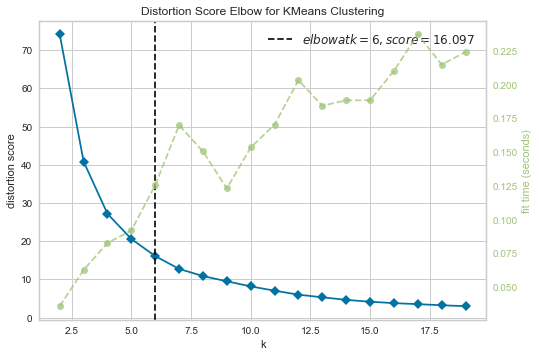

In [59]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(scaled_rfm)
visu.poof();

# Model Optimization

In [60]:
kmeans = KMeans(n_clusters = 6).fit(scaled_rfm)
kmeans

KMeans(n_clusters=6)

In [61]:
kmeans.labels_

array([3, 4, 0, ..., 4, 4, 4])

In [62]:
scaled_rfm['Cluster_Num'] = kmeans.labels_
scaled_rfm['Cluster_Num'] = scaled_rfm['Cluster_Num'] + 1

In [63]:
scaled_rfm.head(20)

,Recency,Frequency,Monetary,Cluster_Num
Customer ID,,,,
12346,1,0,0,4
12347,0,0,0,5
12348,0,0,0,1
12349,0,0,0,5
12350,1,0,0,4
12352,0,0,0,5
12353,1,0,0,2
12354,1,0,0,2
12355,1,0,0,2


In [64]:
# If we want to see the real values of recency, frequency, and monetary
rfm['Cluster_Num'] = kmeans.labels_
rfm['Cluster_Num'] = rfm['Cluster_Num'] + 1

In [65]:
rfm.head(20)

,Recency,Frequency,Monetary,Cluster_Num
Customer ID,,,,
12346,324,1,77184,4
12347,1,7,4310,5
12348,74,4,1797,1
12349,17,1,1758,5
12350,309,1,334,4
12352,35,8,2506,5
12353,203,1,89,2
12354,231,1,1079,2
12355,213,1,459,2


In [66]:
# In order to see the number of customers in each cluster

scaled_rfm.groupby('Cluster_Num').agg({'Cluster_Num': 'count'})

,Cluster_Num
Cluster_Num,
1,1058
2,448
3,531
4,293
5,1985
6,24


In [67]:
scaled_rfm.groupby('Cluster_Num').agg(np.mean)

,Recency,Frequency,Monetary
Cluster_Num,,,
1,0,0,0
2,1,0,0
3,0,0,0
4,1,0,0
5,0,0,0
6,0,0,0


In [68]:
# This will help to  understand better the clusters

rfm.groupby('Cluster_Num').agg(np.mean)

,Recency,Frequency,Monetary
Cluster_Num,,,
1,69,3,1057
2,245,1,588
3,155,2,790
4,334,1,652
5,16,6,2422
6,4,70,88004


In [69]:
# In order to see the customer in Cluster Number 6  

scaled_rfm[scaled_rfm['Cluster_Num'] == 6].head()

,Recency,Frequency,Monetary,Cluster_Num
Customer ID,,,,
12415,0,0,0,6
12748,0,1,0,6
12971,0,0,0,6
13089,0,0,0,6
13408,0,0,0,6


In [70]:
# to export any cluster (here 6th cluster)
#We can list any group (cluster) of costumer in csv or excel format. 

scaled_rfm[scaled_rfm['Cluster_Num'] == 6].index

Int64Index([12415, 12748, 12971, 13089, 13408, 13694, 13798, 14156, 14298,
            14606, 14646, 14911, 15061, 15311, 16013, 16029, 16422, 16446,
            16684, 17450, 17511, 17841, 17949, 18102],
           dtype='int64', name='Customer ID')

In [71]:
sixth_cluster_df = pd.DataFrame()
sixth_cluster_df[6] = scaled_rfm[scaled_rfm['Cluster_Num'] == 6].index

In [72]:
sixth_cluster_df.head()

,6
0,12415
1,12748
2,12971
3,13089
4,13408


In [73]:
sixth_cluster_df.to_csv('sixth_cluster.csv')

## Conclusion

Analyses results indicated that optimum cluster number for K-Means analysis is 6 for Hitters. When we evaluate K-Means results, in terms of the means of recency, frequency, and monetary metrics, cluster number 6 is the best cluster. In terms of the means of frequencies, Cluster 2 and Cluster 4 are the worst groups. In terms of the mean of Monetary, Cluster 2 is the worst cluster and in terms of the means of the Recency, Cluster 4 is the worst cluster. 